In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data collection and Analysis

In [ ]:
insurance_dataset = pd.read_csv('/content/insurance.csv')

In [ ]:
#first 5 rows of the DataFrame
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#number of rows and columns
insurance_dataset.shape

(1338, 7)

In [ ]:
#getting some information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis


In [ ]:
#statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-76-bd30c7d221f2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


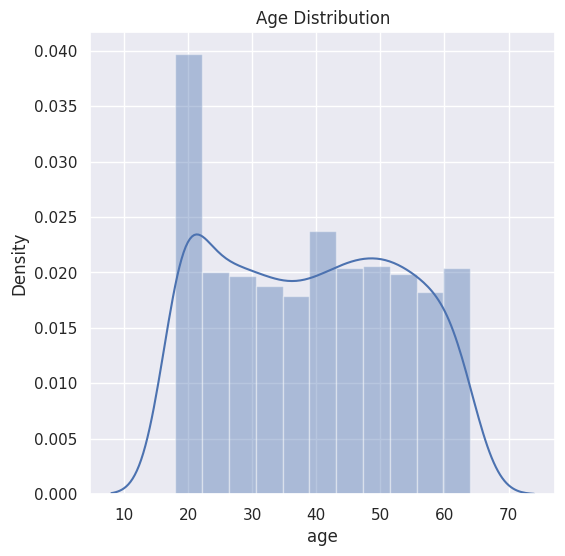

In [ ]:
#distribution of age value
sns.set()  #for grid and themes
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])   
plt.title('Age Distribution')
plt.show()

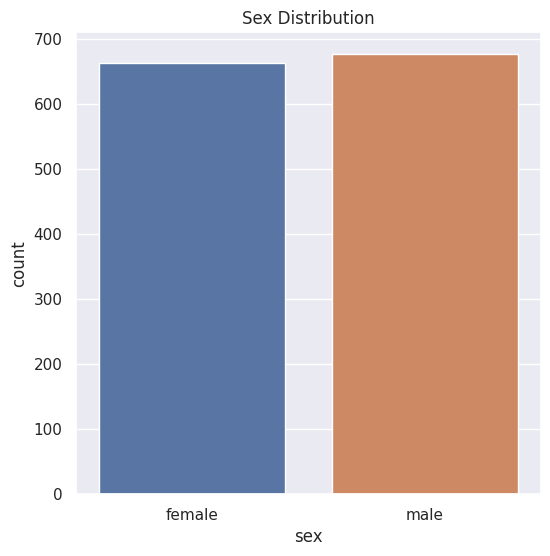

In [ ]:
#Gender Column
plt.figure(figsize=(6,6))
sns.countplot(x='sex' , data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [ ]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<ipython-input-79-63f18887351c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


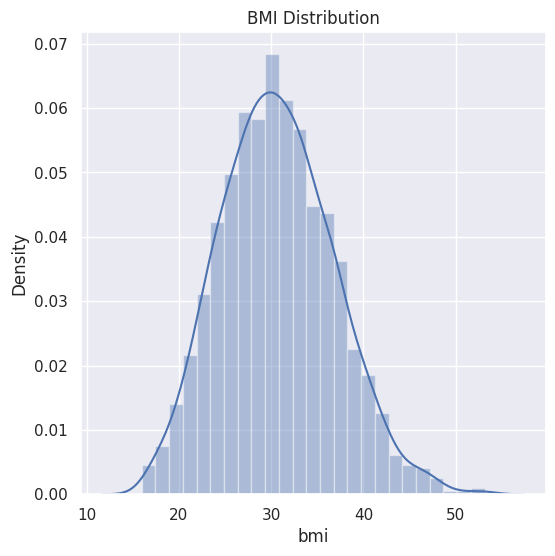

In [ ]:
#bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])   
plt.title('BMI Distribution')
plt.show()

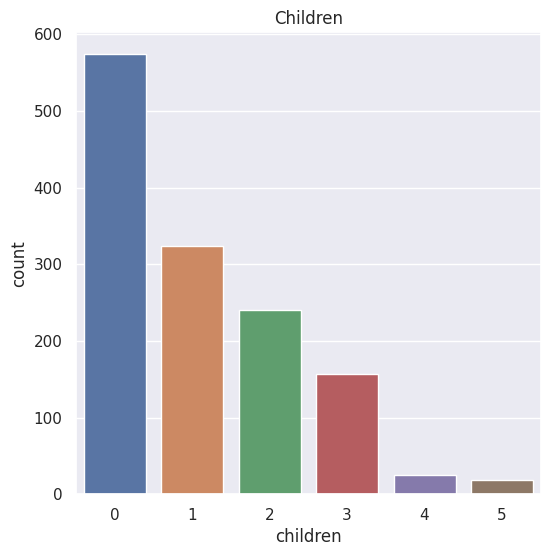

In [ ]:
#children column
plt.figure(figsize=(6,6))
sns.countplot(x='children' , data=insurance_dataset)
plt.title('Children')
plt.show()

In [ ]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

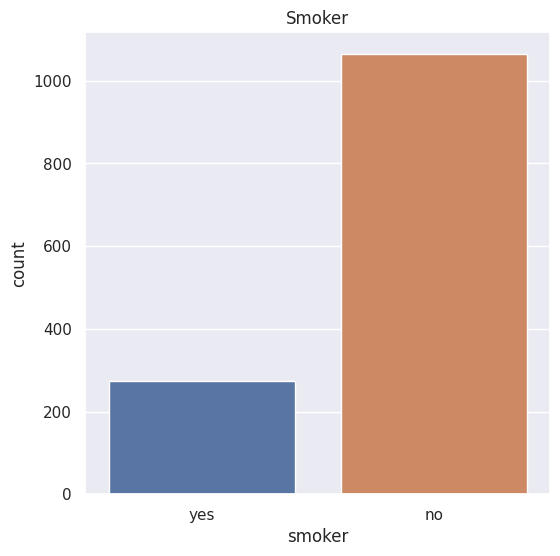

In [ ]:
#smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker' , data=insurance_dataset)
plt.title('Smoker')
plt.show()

In [ ]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

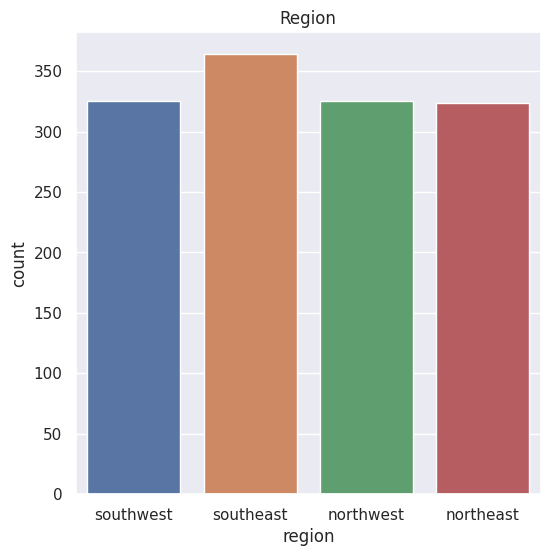

In [ ]:
#smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='region' , data=insurance_dataset)
plt.title('Region')
plt.show()

In [ ]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<ipython-input-86-3d4124163454>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


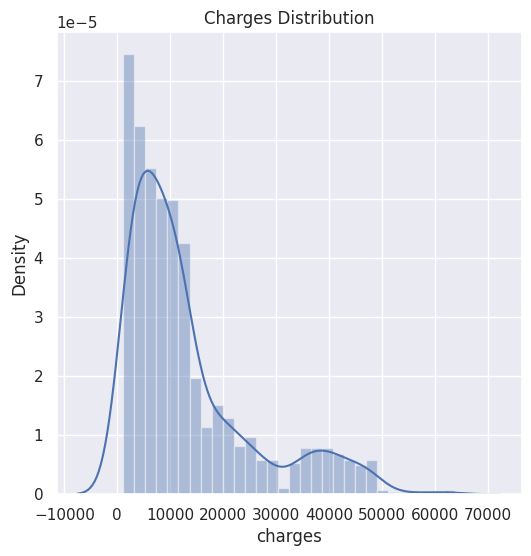

In [ ]:
#bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])   
plt.title('Charges Distribution')
plt.show()


Data Pre Processing


Encoding the catagorical features


In [ ]:
#encoding sex column
insurance_dataset.replace({'sex':{'male':0 , 'female':1}} , inplace = True)

#encoding smoker column
insurance_dataset.replace({'smoker':{'yes':0 , 'no':1}} , inplace = True)

#encoding region column
insurance_dataset.replace({'region':{'southeast':0 , 'southwest':1 , 'northeast':2 , 'northwest':3}} , inplace = True)


In [ ]:
print(insurance_dataset)

      age  sex     bmi  children  smoker  region      charges
0      19    1  27.900         0       0       1  16884.92400
1      18    0  33.770         1       1       0   1725.55230
2      28    0  33.000         3       1       0   4449.46200
3      33    0  22.705         0       1       3  21984.47061
4      32    0  28.880         0       1       3   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    0  30.970         3       1       3  10600.54830
1334   18    1  31.920         0       1       2   2205.98080
1335   18    1  36.850         0       1       0   1629.83350
1336   21    1  25.800         0       1       1   2007.94500
1337   61    1  29.070         0       0       3  29141.36030

[1338 rows x 7 columns]


Spliting the features and target

In [ ]:
X = insurance_dataset.drop(columns = 'charges' , axis=1)
Y = insurance_dataset['charges']

In [ ]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [ ]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


:Spliting the data into training data and testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear Regression

In [ ]:
#loading the linear regression model 
regressor = LinearRegression()


In [ ]:
regressor.fit(X_train, Y_train)

LinearRegression()

Model Evaluation 

In [ ]:
#prediction on training data

In [ ]:
training_data_prediction = regressor.predict(X_train)

In [ ]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value : ', r2_train)


R squared value :  0.751505643411174


In [ ]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)


In [ ]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value : ', r2_test)

R squared value :  0.7447273869684076


Building the predictive system



In [ ]:
input_data = (39,1,25.80,0,1,0)

In [ ]:
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print("the prediction cost is USD", prediction[0])

[6042.56545642]
the prediction cost is USD 6042.5654564227225


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
